In [122]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score , accuracy_score , precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode label
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model FCN
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # Lapisan input dengan 10 neuron
model.add(Dense(10, activation='relu'))                    # Lapisan tersembunyi dengan 10 neuron
model.add(Dense(3, activation='softmax'))                  # Lapisan output dengan 3 neuron (untuk 3 kelas)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih modela
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [127]:
df = pd.read_excel("../data/bandwidth_video_quality_with_bitrate_V2.xlsx")

bandwidth = np.array([df["Bandwidth (Mbps)"]]).reshape(-1,1)
bitrate = np.array([df["Bitrate (Mbps)"]]).reshape(-1,1)
print(df)


     Bandwidth (Mbps) Video Quality  Bitrate (Mbps)
0               0.671          144p             0.3
1               0.863          144p             0.3
2               1.057          144p             0.3
3               1.514          144p             0.3
4               2.713          144p             0.3
..                ...           ...             ...
228            27.173          480p             2.5
229            27.181          480p             2.5
230            32.942          480p             2.5
231            33.173          480p             2.5
232            33.814          480p             2.5

[233 rows x 3 columns]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(bandwidth, bitrate, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# 4. Membangun model FCN
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Lapisan input dengan 64 neuron
model.add(Dense(64, activation='relu'))  # Lapisan tersembunyi dengan 64 neuron
model.add(Dense(1))  # Lapisan output (prediksi harga rumah)

# 5. Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# 6. Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# 7. Mengevaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')



Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7990
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1800 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0643 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0437 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0355 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0468 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0341 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0384 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0268
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 
Epoch 16/100
6/6 ━━

In [121]:
# 8. Prediksi dengan data baru
# Misalkan kita memiliki data baru berikut:
data_baru = np.array([23.5]).reshape(-1,1)  # Ganti dengan fitur yang sesuai
data_baru = scaler.transform(data_baru)  # Standardisasi data baru

# Melakukan prediksi
prediksi_bitrate= model.predict(data_baru)
print(f'Prediksi harga rumah: {prediksi_bitrate}')
model.save('./bandwidth_bitrate_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediksi harga rumah: [[1.372357]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step   
0.9736255535091238


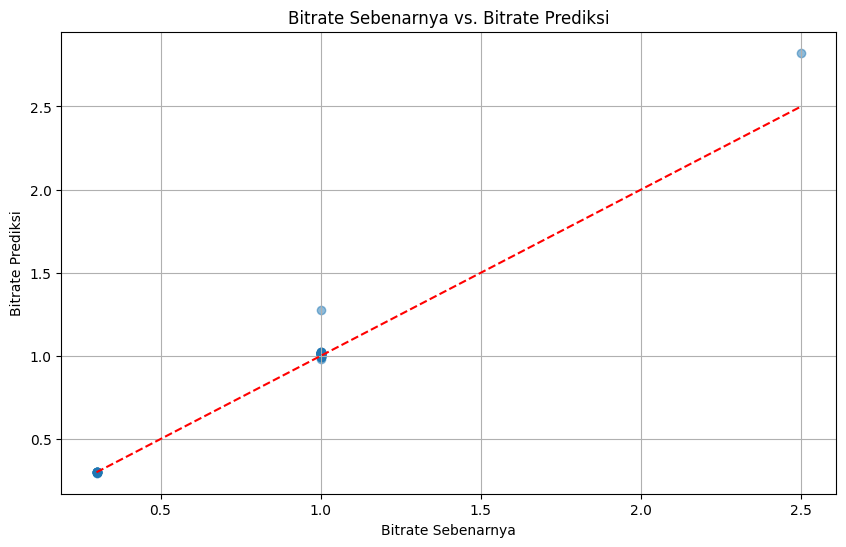

In [126]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)

# # Precision
# precision = precision_score(y_test, y_pred)
# print(f'Precision: {precision}')

print(r2)
# 9. Plot hasil prediksi vs harga sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Bitrate Sebenarnya')
plt.ylabel('Bitrate Prediksi')
plt.title('Bitrate Sebenarnya vs. Bitrate Prediksi')
plt.grid(True)
plt.show()

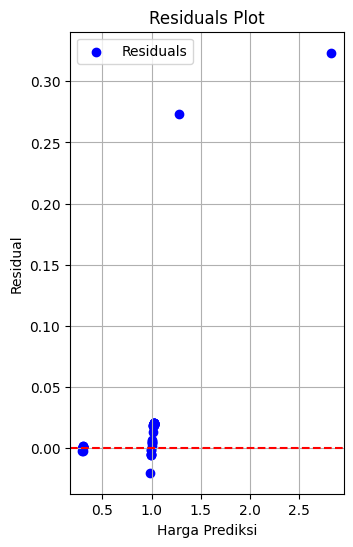

In [105]:

# 9. Plot Residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred, y_pred - y_test, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Harga Prediksi')
plt.ylabel('Residual')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)

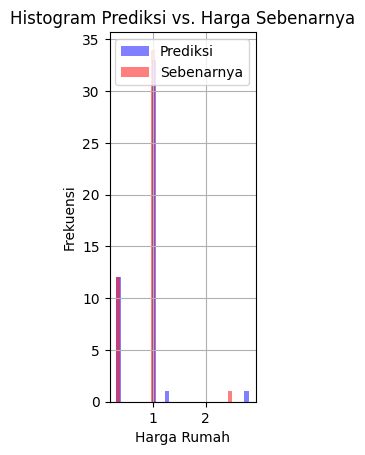

In [114]:
# 10. Histogram Prediksi dan Harga Sebenarnya
plt.subplot(1, 3, 2)
plt.hist(y_pred, bins=30, alpha=0.5, label='Prediksi', color='blue')
plt.hist(y_test, bins=30, alpha=0.5, label='Sebenarnya', color='red')
plt.xlabel('Harga Rumah')
plt.ylabel('Frekuensi')
plt.title('Histogram Prediksi vs. Harga Sebenarnya')
plt.legend()
plt.grid(True)
